In [319]:
# Import required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import hvplot.pandas

In [320]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

# Display sample data
market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [321]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


### Prepare the Data

In [322]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaler = StandardScaler()
normal_MD = scaler.fit_transform(market_data_df)

In [323]:
# Create a DataFrame with the scaled data
scaled_df = pd.DataFrame(
    normal_MD,
    columns=market_data_df.columns,
    index=market_data_df.index
)
# Display sample data
print(scaled_df.head())

              price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                 
bitcoin                          0.508529                    0.493193   
ethereum                         0.185446                    0.934445   
tether                           0.021774                   -0.706337   
ripple                          -0.040764                   -0.810928   
bitcoin-cash                     1.193036                    2.000959   

              price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                  
bitcoin                          0.772200                     0.235460   
ethereum                         0.558692                    -0.054341   
tether                          -0.021680                    -0.061030   
ripple                           0.249458                    -0.050388   
bitcoin-cash                     1.760610   

### Find the Best Value for k Using the Original Scaled DataFrame.

In [324]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_values = list(range(1,11))

# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
# Inside the loop:

# 1. Create a KMeans model using the loop counter for the n_clusters
    model = KMeans(n_clusters=k, random_state=42)
# 2. Fit the model to the data using the scaled DataFrame
    model.fit(scaled_df)
# 3. Append the model.inertia_ to the inertia list
    inertia.append(model.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    'k': k_values,
    'inertia': inertia
}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

# Display the DataFrame
print(elbow_df)

    k     inertia
0   1  287.000000
1   2  212.123342
2   3  170.193571
3   4   79.022435
4   5   71.097914
5   6   66.108827
6   7   54.488123
7   8   43.224693
8   9   32.860884
9  10   28.404885


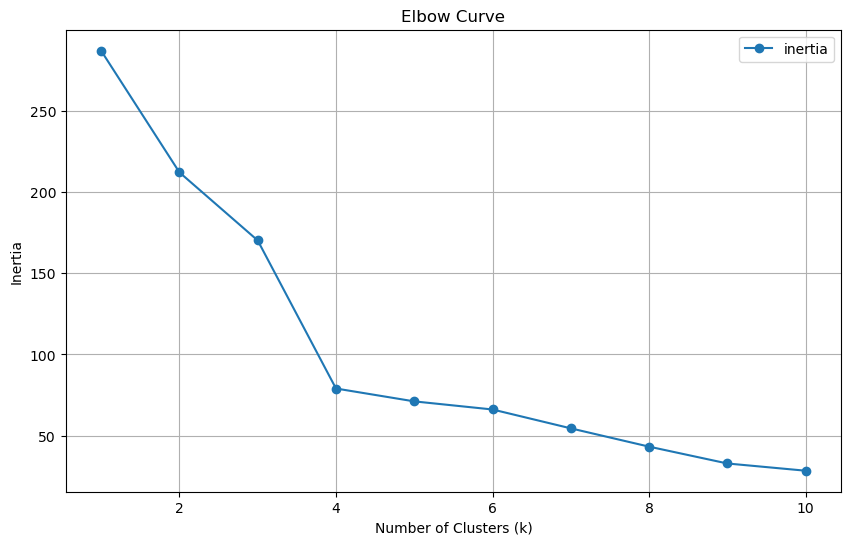

In [325]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
elbow_plot = elbow_df.plot(
    x='k',
    y='inertia',
    kind='line',
    marker='o',
    title='Elbow Curve',
    xlabel='Number of Clusters (k)',
    ylabel='Inertia',
    grid=True,
    figsize=(10,6)
)


#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer:**   4

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [326]:
# Initialize the K-Means model using the best value for k
kmeans = KMeans(n_clusters=4)


In [327]:
# Fit the K-Means model using the scaled data
kmeans.fit(scaled_df)

KMeans(n_clusters=4)

In [328]:
# Predict the clusters to group the cryptocurrencies using the scaled data
clusters = kmeans.predict(scaled_df)

# View the resulting array of cluster values.
print(clusters)

[0 0 1 1 0 0 0 0 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 2 0 1 1 3
 1 1 1 1]


In [329]:
# Create a copy of the DataFrame
clustered_df = scaled_df.copy()

In [330]:
# Add a new column to the DataFrame with the predicted clusters
clustered_df['Cluster'] = clusters

# Display sample data
print(clustered_df.head())

              price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                 
bitcoin                          0.508529                    0.493193   
ethereum                         0.185446                    0.934445   
tether                           0.021774                   -0.706337   
ripple                          -0.040764                   -0.810928   
bitcoin-cash                     1.193036                    2.000959   

              price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                  
bitcoin                          0.772200                     0.235460   
ethereum                         0.558692                    -0.054341   
tether                          -0.021680                    -0.061030   
ripple                           0.249458                    -0.050388   
bitcoin-cash                     1.760610   

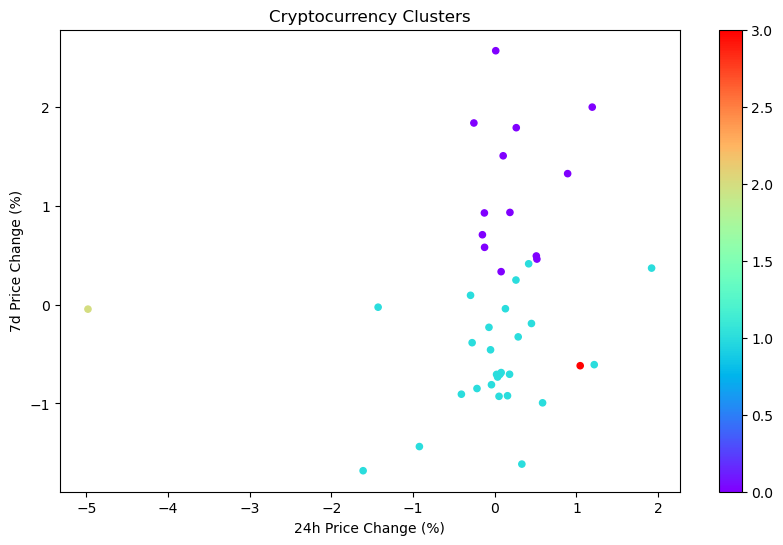

In [331]:
# Create a scatter plot using Pandas plot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.
clustered_plot = clustered_df.plot(
    kind="scatter",
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    c=clustered_df['Cluster'],
    colormap="rainbow",
    title="Cryptocurrency Clusters",
    xlabel="24h Price Change (%)",
    ylabel="7d Price Change (%)",
    figsize=(10, 6)
)

### Optimize Clusters with Principal Component Analysis.

In [332]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [333]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
pca_data = pca.fit_transform(scaled_df)

# View the first five rows of the DataFrame. 
pca_df = pd.DataFrame(
    data=pca_data,
    columns=['PC1', 'PC2', 'PC3'],
    index=scaled_df.index
)
print(pca_df.head())

                   PC1       PC2       PC3
coin_id                                   
bitcoin      -0.600667  0.842760  0.461595
ethereum     -0.458261  0.458466  0.952877
tether       -0.433070 -0.168126 -0.641752
ripple       -0.471835 -0.222660 -0.479053
bitcoin-cash -1.157800  2.041209  1.859715


In [334]:
# Retrieve the explained variance to determine how much information  can be attributed to each principal component.
explained_variance = pca.explained_variance_ratio_

# Print the explained variance ratio for each component
print("Explained Variance Ratio:")
for i, var in enumerate(explained_variance):
    print(f"PC{i+1}: {var:.4f} ({var*100:.2f}%)")

# Calculate and print total explained variance
total_var = sum(explained_variance)
print(f"\nTotal Explained Variance: {total_var:.4f} ({total_var*100:.2f}%)")

Explained Variance Ratio:
PC1: 0.3720 (37.20%)
PC2: 0.3470 (34.70%)
PC3: 0.1760 (17.60%)

Total Explained Variance: 0.8950 (89.50%)


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 89.50%

In [335]:
# Create a new DataFrame with the PCA data.
# Note: The code for this step is provided for you (?)

# Creating a DataFrame with the PCA data


# Copy the crypto names from the original data


# Set the coinid column as index


# Display sample data
print(pca_df.head())

                   PC1       PC2       PC3
coin_id                                   
bitcoin      -0.600667  0.842760  0.461595
ethereum     -0.458261  0.458466  0.952877
tether       -0.433070 -0.168126 -0.641752
ripple       -0.471835 -0.222660 -0.479053
bitcoin-cash -1.157800  2.041209  1.859715


### Find the Best Value for k Using the PCA Data

In [336]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
#Alread created k_values earlier

# Create an empty list to store the inertia values
pca_inertia = []

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
    model = KMeans(n_clusters=k, random_state=42)
# 2. Fit the model to the data using PCA DataFrame.
    model.fit(pca_df)
# 3. Append the model.inertia_ to the inertia list
    pca_inertia.append(model.inertia_)

# Create a dictionary with the data to plot the Elbow curve
pca_elbow_data = {
    'k': k_values,
    'inertia': pca_inertia
}

# Create a DataFrame with the data to plot the Elbow curve
pca_elbow_df = pd.DataFrame(pca_elbow_data)

# Display the DataFrame
print(pca_elbow_df)

    k     inertia
0   1  256.874086
1   2  182.339530
2   3  140.431833
3   4   49.665497
4   5   42.051901
5   6   31.749005
6   7   28.031869
7   8   19.451747
8   9   13.814082
9  10   10.630648


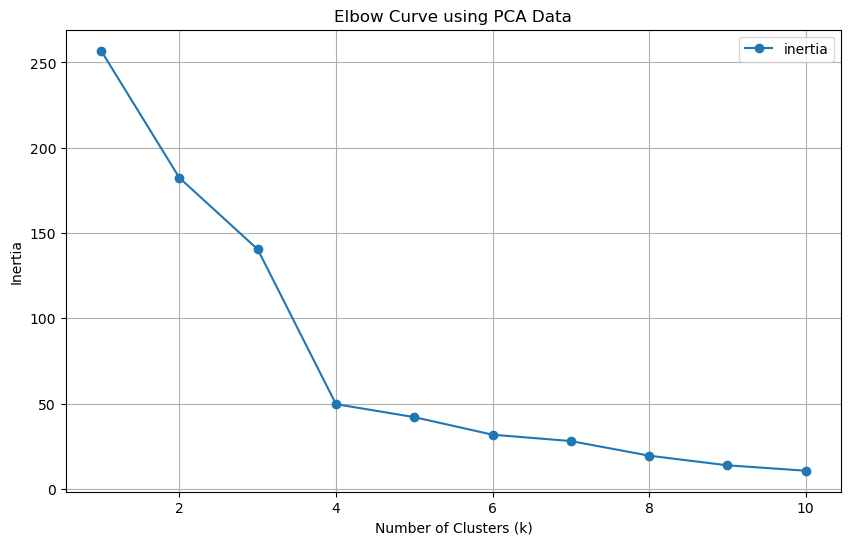

In [337]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
pca_elbow_plot = pca_elbow_df.plot(
    x='k',
    y='inertia',
    kind='line',
    marker='o',
    title='Elbow Curve using PCA Data',
    xlabel='Number of Clusters (k)',
    ylabel='Inertia',
    grid=True,
    figsize=(10,6)
)

#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:**  no 

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [338]:
# Initialize the K-Means model using the best value for k
pca_kmeans =  KMeans(n_clusters=4)

In [339]:
# Fit the K-Means model using the PCA data
pca_kmeans.fit(pca_df)

KMeans(n_clusters=4)

In [340]:
# Predict the clusters to group the cryptocurrencies using the PCA data
pca_clusters = pca_kmeans.predict(pca_df)

# Print the resulting array of cluster values.
print(pca_clusters)

[1 1 0 0 1 1 1 1 1 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 2 1 0 0 3
 0 0 0 0]


In [341]:
# Create a copy of the DataFrame with the PCA data
clustered_pca_df = pca_df.copy()

# Add a new column to the DataFrame with the predicted clusters
clustered_pca_df['Cluster'] = pca_clusters

# Display sample data
print(clustered_pca_df.head())

                   PC1       PC2       PC3  Cluster
coin_id                                            
bitcoin      -0.600667  0.842760  0.461595        1
ethereum     -0.458261  0.458466  0.952877        1
tether       -0.433070 -0.168126 -0.641752        0
ripple       -0.471835 -0.222660 -0.479053        0
bitcoin-cash -1.157800  2.041209  1.859715        1


In [342]:
# Create a scatter plot using hvPlot by setting `x="PCA1"` and `y="PCA2"`. 
scatter_plot = clustered_pca_df.hvplot.scatter(
    x='PC1', 
    y='PC2', 
    by='Cluster', 
    hover_cols=['coin_id'], 
    title='Cryptocurrency Clusters based on PCA',
    xlabel='Principal Component 1',
    ylabel='Principal Component 2'
)
scatter_plot

:NdOverlay   [Cluster]
   :Scatter   [PC1]   (PC2,coin_id)

### Determine the Weights of Each Feature on each Principal Component

In [343]:
# Use the columns from the original scaled DataFrame as the index.
#Creating a dataframe with pca components
pca_components = pd.DataFrame(
    data=pca.components_.T,
    columns=['PC1', 'PC2', 'PC3'],
    index=market_data_df.columns
)
#Displaying the pca Components 
print(pca_components)

                                   PC1       PC2       PC3
price_change_percentage_24h  -0.416728  0.358162 -0.218795
price_change_percentage_7d   -0.102432  0.227432  0.787670
price_change_percentage_14d  -0.009162  0.540415  0.349534
price_change_percentage_30d   0.191523  0.562182 -0.181744
price_change_percentage_60d   0.320365  0.434040 -0.361377
price_change_percentage_200d  0.594468  0.027735  0.039733
price_change_percentage_1y    0.568379 -0.150789  0.210541


#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answer:** 
    PC1: Strongest positive is the .594 with price change over 200 days.

    PC2: The strongest positive influence is the .562 with the price change over 30 days.

    PC3: The  strongest positive influince is the 7 day change percantage with .788.